# Biodiversity in national parks

## Introduction

The data is provided by the Codecademy.com community and it's part of the Data Science Career Path program.  
Data is divided into two separate .csv files - observations and species.  
  
The main goal is:  
- to find some corelation between some species and their conservation status  
- which species are more likely to be endangered  
- which park have the most species  
- which species are more prevalent through parks  


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colormaps
import seaborn as sns

## 1. Importing and inspecting the data

### First we'll import and examen the observations.csv file.

In [2]:
observations = pd.read_csv("observations.csv")

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
observations.nunique()

scientific_name    5541
park_name             4
observations        304
dtype: int64

### Now let's check the species.csv file

In [7]:
species = pd.read_csv("species_info.csv")

In [8]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [9]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [10]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [11]:
print(species["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We can see that there were 23296 observations in 4 different parks.  
We have 7 different categories of species (mammals, plants, birds, ...) and 5541 different types of species (scientific names).  
There is a lot of "missing" data in the conservation status. There are 4 categories of conservation status (Species of Concern, Endangered, Threatened, and In Recovery). So we can assume that the "missing" data is not missing, they are just not endangered or threatened.

## 2. Clenaing the data

If we look at the data, it seems pretty clean.  
There is just a few changes we could do and check if there are any duplicates.

In [12]:
# In the observation data we can get rid of the "National Park" postscript from the park names in park_names column.
observations["park_name"] = observations["park_name"].str.replace(" National Park", "")
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85
...,...,...,...
23291,Croton monanthogynus,Yosemite,173
23292,Otospermophilus beecheyi,Bryce,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce,140
23294,Dicranella rufescens,Yosemite,171


In [13]:
# We saw that there is no "missing data" in the species data - conservation_status, so we can fill (or replace) NaN with "Not in danger".
species = species.fillna(value={"conservation_status": "Not in danger"})
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not in danger
1,Mammal,Bos bison,"American Bison, Bison",Not in danger
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not in danger
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not in danger
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not in danger
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Not in danger
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Not in danger
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Not in danger
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Not in danger


In [14]:
# Because the common names of the species can vary form country to country and there could be some errors, we could drop the column "common_names" and just use the scientific (Latin) names
species = species.drop("common_names", axis=1)

In [15]:
# Now lets check if there are any duplicates our data
print("Observation data duplicates:")
observations.duplicated().value_counts()

Observation data duplicates:


False    23281
True        15
Name: count, dtype: int64

In [16]:
print("Species data duplicates:")
species.duplicated().value_counts()

Species data duplicates:


False    5543
True      281
Name: count, dtype: int64

We see that we have some duplicates.  
There are 15 duplicates in the observation data, and 281 duplicates in the species data.  
We can drop the duplicates and then we could merge the observation data and species data.

In [17]:
# First we need to drop the duplicates
obs_no_dupl = observations.drop_duplicates()
spec_no_dupl = species.drop_duplicates()

In [18]:
# Now we can merge the data info one dataframe, on the "scientific_name" column
df = pd.merge(spec_no_dupl, obs_no_dupl, on="scientific_name", how="inner")
df

,category,scientific_name,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Not in danger,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Not in danger,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Not in danger,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Not in danger,Yosemite,117
4,Mammal,Bos bison,Not in danger,Yosemite,128
...,...,...,...,...,...
23296,Vascular Plant,Vitis californica,Not in danger,Yellowstone,237
23297,Vascular Plant,Tribulus terrestris,Not in danger,Great Smoky Mountains,50
23298,Vascular Plant,Tribulus terrestris,Not in danger,Yellowstone,239
23299,Vascular Plant,Tribulus terrestris,Not in danger,Bryce,111


## 3. Exploring the data

In [71]:
# First lets check the distribution of observations across the parks
obs_dist = df.groupby("park_name")["observations"].sum().reset_index()
obs_dist

,park_name,observations
0,Bryce,576195
1,Great Smoky Mountains,431537
2,Yellowstone,1443016
3,Yosemite,863209


In [59]:
print("The number of all observations:")
print(obs_dist["observations"].sum())

The number of all observations:
3313957


In [20]:
colors = plt.get_cmap('tab20c').colors

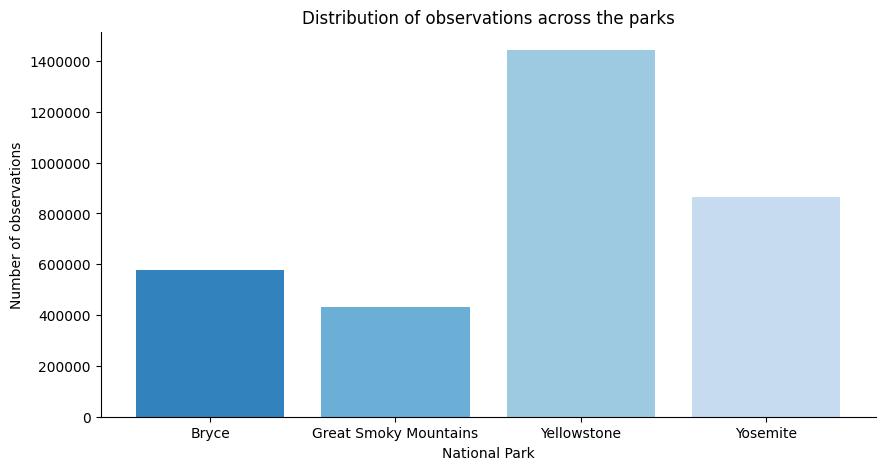

<Figure size 640x480 with 0 Axes>

In [72]:

plt.figure(figsize=(10,5))

ax = plt.subplot()
plt.bar(obs_dist["park_name"], obs_dist["observations"], color=colors, width=0.8)

ax.set(title='Distribution of observations across the parks', xlabel='National Park', ylabel='Number of observations')
plt.xticks(ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')

plt.show()
plt.clf()

In [22]:
# Lets check the different species category and their distribution through the parks
spec_cat = df.groupby("category")["observations"].sum().reset_index()
spec_cat

,category,observations
0,Amphibian,43971
1,Bird,292578
2,Fish,71631
3,Mammal,117155
4,Nonvascular Plant,190653
5,Reptile,44678
6,Vascular Plant,2553291


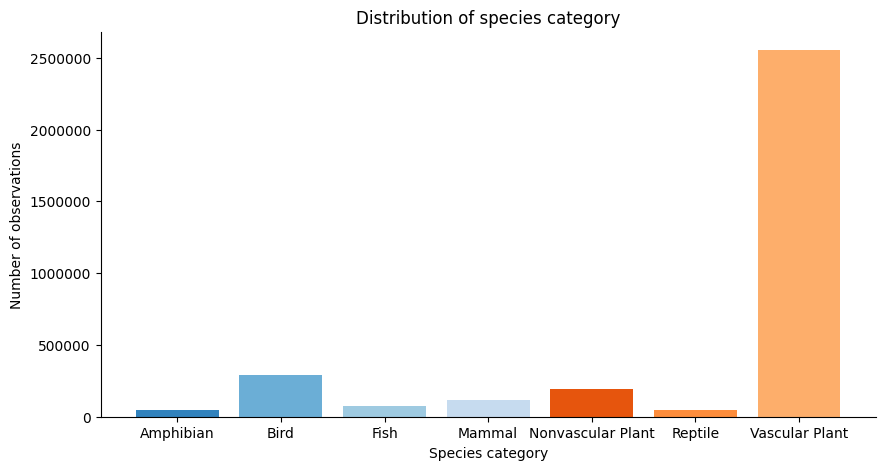

<Figure size 640x480 with 0 Axes>

In [83]:
plt.figure(figsize=(10,5))

ax = plt.subplot()
plt.bar(spec_cat["category"], spec_cat["observations"], color=colors, width=0.8)

ax.set(title='Distribution of species category', xlabel='Species category', ylabel='Number of observations')
plt.xticks(ha="center")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')

plt.show()
plt.clf()

In [24]:
bryce_cat = df[df["park_name"] == "Bryce"].groupby("category")["observations"].sum().reset_index()
gsm_cat = df[df["park_name"] == "Great Smoky Mountains"].groupby("category")["observations"].sum().reset_index()
yellowstone_cat = df[df["park_name"] == "Yellowstone"].groupby("category")["observations"].sum().reset_index()
yosemite_cat = df[df["park_name"] == "Yosemite"].groupby("category")["observations"].sum().reset_index()

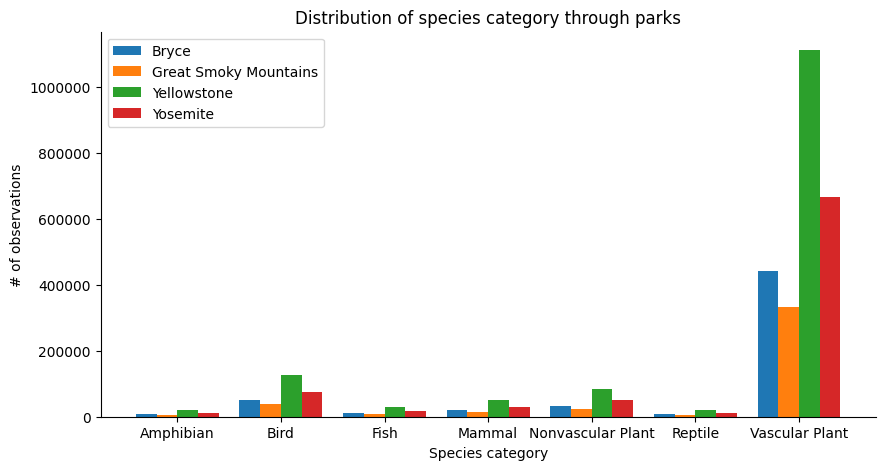

<Figure size 640x480 with 0 Axes>

In [79]:
# Bryce park in blue color
n = 1  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values1 = [t*bryce_cat + w*n for bryce_cat in range(d)]

# Great Smoky Mountains park in orange color
n = 2  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values2 = [t*gsm_cat + w*n for gsm_cat in range(d)]

# Yellowstone park in green color
n = 3  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values3 = [t*yellowstone_cat + w*n for yellowstone_cat in range(d)]

# Yosemite park in red color
n = 4  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values4 = [t*yosemite_cat + w*n for yosemite_cat in range(d)]

middle_x = [(a + b + c + d) / 4.0 for a, b, c, d in zip(x_values1, x_values2, x_values3, x_values4)]

plt.figure(figsize=(10,5))
ax = plt.subplot()
plt.bar(x_values1, bryce_cat["observations"])
plt.bar(x_values2, gsm_cat["observations"])
plt.bar(x_values3, yellowstone_cat["observations"])
plt.bar(x_values4, yosemite_cat["observations"])

ax.set_xticks(middle_x)

ax.legend(["Bryce", "Great Smoky Mountains", "Yellowstone", "Yosemite"])
ax.set_xlabel("Species category")
ax.set_ylabel("# of observations")
plt.title("Distribution of species category through parks")
#plt.xticks(rotation = 25)

ax.set_xticklabels(spec_cat["category"], ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')

plt.show()
plt.clf()

In [26]:
# Now lets check the Conservation status of the observed species through parks

In [27]:
cons_stat = species[species["conservation_status"] != "Not in danger"]\
    .groupby(["conservation_status", "category"])["scientific_name"].count().unstack()
cons_stat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [28]:
cons_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Endangered to Threatened
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amphibian          3 non-null      float64
 1   Bird               3 non-null      float64
 2   Fish               3 non-null      float64
 3   Mammal             4 non-null      float64
 4   Nonvascular Plant  1 non-null      float64
 5   Reptile            1 non-null      float64
 6   Vascular Plant     3 non-null      float64
dtypes: float64(7)
memory usage: 256.0+ bytes


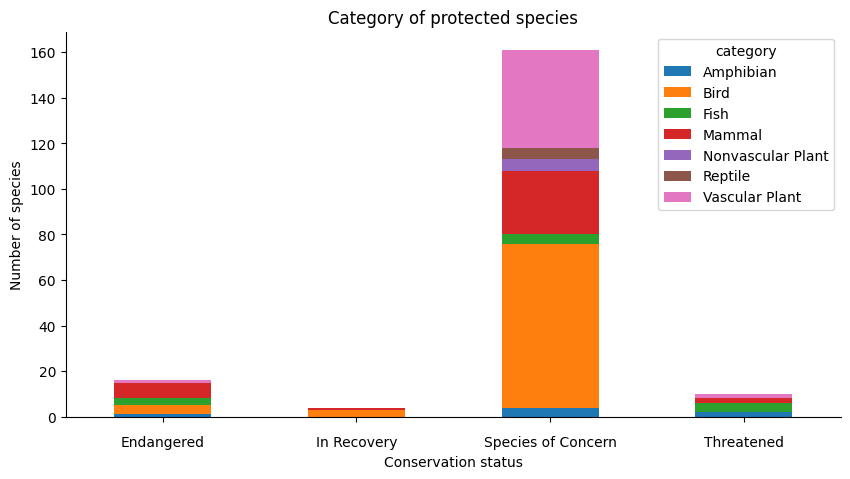

<Figure size 640x480 with 0 Axes>

In [89]:
ax = cons_stat.plot(kind="bar", figsize=(10,5), stacked=True)
ax.set_xlabel("Conservation status")
ax.set_ylabel("Number of species")
ax.set_title("Category of protected species")
ax.tick_params(axis="x", which="major", pad=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=0, ha="center")

plt.show()
plt.clf()

In [30]:
cons_spec_park = df[df.conservation_status != "Not in danger"].reset_index()
cons_spec_park = cons_spec_park.drop('index', axis=1)
cons_spec_park 

,category,scientific_name,conservation_status,park_name,observations
0,Mammal,Canis latrans,Species of Concern,Bryce,85
1,Mammal,Canis latrans,Species of Concern,Yellowstone,206
2,Mammal,Canis latrans,Species of Concern,Great Smoky Mountains,68
3,Mammal,Canis latrans,Species of Concern,Yosemite,99
4,Mammal,Canis lupus,Endangered,Yosemite,35
...,...,...,...,...,...
775,Vascular Plant,Botrychium ascendens,Species of Concern,Great Smoky Mountains,30
776,Vascular Plant,Romneya coulteri,Species of Concern,Bryce,101
777,Vascular Plant,Romneya coulteri,Species of Concern,Yosemite,125
778,Vascular Plant,Romneya coulteri,Species of Concern,Great Smoky Mountains,67


In [31]:
cons_spec_park = cons_spec_park.groupby(["category", "park_name"])\
    ["observations"].sum().reset_index()
cons_spec_park

,category,park_name,observations
0,Amphibian,Bryce,498
1,Amphibian,Great Smoky Mountains,333
2,Amphibian,Yellowstone,1167
3,Amphibian,Yosemite,754
4,Bird,Bryce,6926
5,Bird,Great Smoky Mountains,4741
6,Bird,Yellowstone,16788
7,Bird,Yosemite,10153
8,Fish,Bryce,731
9,Fish,Great Smoky Mountains,547


In [32]:
bryce_con = cons_spec_park[cons_spec_park["park_name"] == "Bryce"].groupby("category")["observations"].sum().reset_index()
gsm_con = cons_spec_park[cons_spec_park["park_name"] == "Great Smoky Mountains"].groupby("category")["observations"].sum().reset_index()
yellowstone_con = cons_spec_park[cons_spec_park["park_name"] == "Yellowstone"].groupby("category")["observations"].sum().reset_index()
yosemite_con = cons_spec_park[cons_spec_park["park_name"] == "Yosemite"].groupby("category")["observations"].sum().reset_index()

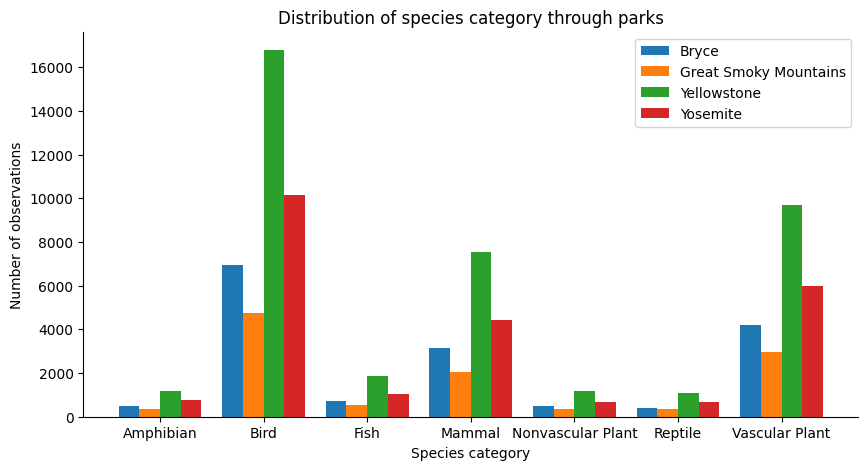

<Figure size 640x480 with 0 Axes>

In [98]:
# Bryce park in blue color
n = 1  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values1_1 = [t*bryce_con + w*n for bryce_con in range(d)]

# Great Smoky Mountains park in orange color
n = 2  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values2_1 = [t*gsm_con + w*n for gsm_con in range(d)]

# Yellowstone park in green color
n = 3  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values3_1 = [t*yellowstone_con + w*n for yellowstone_con in range(d)]

# Yosemite park in red color
n = 4  # This is our first dataset (out of 4)
t = 4 # Number of datasets
d = 7 # Number of sets of bars (categories)
w = 0.8 # Width of each bar
x_values4_1 = [t*yosemite_con + w*n for yosemite_con in range(d)]

middle_x_1 = [(a + b + c + d) / 4.0 for a, b, c, d in zip(x_values1_1, x_values2_1, x_values3_1, x_values4_1)]

plt.figure(figsize=(10,5))
ax = plt.subplot()
plt.bar(x_values1_1, bryce_con["observations"])
plt.bar(x_values2_1, gsm_con["observations"])
plt.bar(x_values3_1, yellowstone_con["observations"])
plt.bar(x_values4_1, yosemite_con["observations"])

ax.set_xticks(middle_x_1)

ax.legend(["Bryce", "Great Smoky Mountains", "Yellowstone", "Yosemite"])
ax.set_xlabel("Species category")
ax.set_ylabel("Number of observations")
plt.title("Distribution of species category through parks")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels(cons_spec_park["category"].unique(), ha="center")

plt.show()
plt.clf()

We can check the percentile of endangered species against "not in danger", among the parks, and through species.

In [34]:
species.describe()

,category,scientific_name,conservation_status
count,5824,5824,5824
unique,7,5541,5
top,Vascular Plant,Castor canadensis,Not in danger
freq,4470,3,5633


In [35]:
species_cstat = species.copy()

In [36]:
species_cstat['endangered'] = np.where(species_cstat['conservation_status'] != 'Not in danger', True, False)
species_cstat.head()

,category,scientific_name,conservation_status,endangered
0,Mammal,Clethrionomys gapperi gapperi,Not in danger,False
1,Mammal,Bos bison,Not in danger,False
2,Mammal,Bos taurus,Not in danger,False
3,Mammal,Ovis aries,Not in danger,False
4,Mammal,Cervus elaphus,Not in danger,False


In [37]:
percentages = species_cstat['endangered'].value_counts(normalize=True).mul(100).astype(str) + '%'
print(percentages)

endangered
False    96.72046703296702%
True     3.279532967032967%
Name: proportion, dtype: object


There are 96,7% of not endangered species and 3,3% of species that are somehow endangered.

In [38]:
print(species_cstat["conservation_status"].value_counts())

conservation_status
Not in danger         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


In [39]:
species_cstat["conservation_status"] = np.where(species_cstat["conservation_status"] == "Not in danger", "Not in danger", "Endagered")
species_cstat.describe()

,category,scientific_name,conservation_status,endangered
count,5824,5824,5824,5824
unique,7,5541,2,2
top,Vascular Plant,Castor canadensis,Not in danger,False
freq,4470,3,5633,5633


In [40]:
endangered_notendangered = species_cstat["conservation_status"].value_counts().reset_index()
endangered_notendangered.head()

,conservation_status,count
0,Not in danger,5633
1,Endagered,191


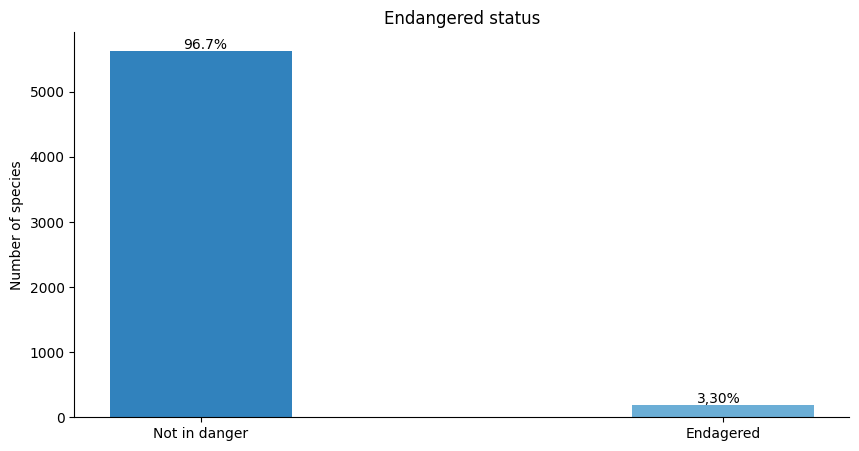

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(10,5))

ax = plt.subplot()
plt.bar(endangered_notendangered["conservation_status"], endangered_notendangered["count"], color=colors, width=0.35)

ax.set(title='Endangered status', xlabel='', ylabel='Number of species')
plt.xticks(ha="center")

ax.annotate(text='96.7%', xy=(-0.035, 5655))
ax.annotate(text='3,30%', xy=(0.95, 215))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.clf()

In [42]:
endangered_species = species[~species["conservation_status"].isin(["Not in danger"])].reset_index()
endangered_species = endangered_species.drop(['index'], axis=1)
endangered_species.head()

,category,scientific_name,conservation_status
0,Mammal,Canis latrans,Species of Concern
1,Mammal,Canis lupus,Endangered
2,Mammal,Canis rufus,Endangered
3,Mammal,Eptesicus fuscus,Species of Concern
4,Mammal,Lasionycteris noctivagans,Species of Concern


In [43]:
percentages_endangered = endangered_species['conservation_status'].value_counts(normalize=True).mul(100).astype(str) + '%'
print(percentages_endangered)

conservation_status
Species of Concern     84.29319371727748%
Endangered              8.37696335078534%
Threatened            5.2356020942408374%
In Recovery            2.094240837696335%
Name: proportion, dtype: object


There are:
- 84,3% of endangered species that are "Species of concern"
- 8,4% of species that are "Endangered"
- 5,2 % "Threatened"
- 2,1% of endangered species "In Recovery".

In [44]:
# We are going to make a copy to use in later analysis
endangered_spec_cat = endangered_species.copy()

In [45]:
endangered_species = endangered_species["conservation_status"].value_counts().reset_index()
endangered_species.head()

,conservation_status,count
0,Species of Concern,161
1,Endangered,16
2,Threatened,10
3,In Recovery,4


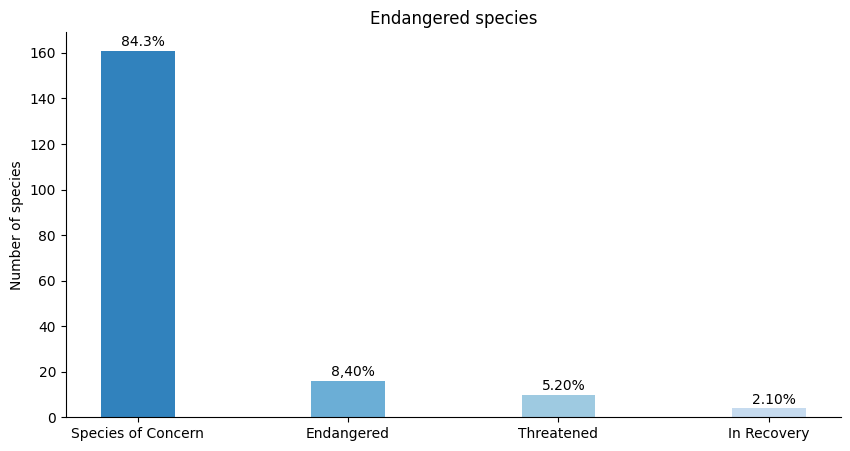

<Figure size 640x480 with 0 Axes>

In [102]:
plt.figure(figsize=(10,5))

ax = plt.subplot()
plt.bar(endangered_species["conservation_status"], endangered_species["count"], color=colors, width=0.35)

ax.set(title='Endangered species', xlabel='', ylabel='Number of species')
plt.xticks(ha="center")

ax.annotate(text='84.3%', xy=(-0.081, 163))
ax.annotate(text='8,40%', xy=(0.92, 18))
ax.annotate(text='5.20%', xy=(1.92, 12))
ax.annotate(text='2.10%', xy=(2.92, 6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.clf()

In [47]:
percentages_endangered_spec_cat = endangered_spec_cat['category'].value_counts(normalize=True).mul(100).astype(str) + '%'
print(percentages_endangered_spec_cat)

category
Bird                 41.361256544502616%
Vascular Plant       24.083769633507853%
Mammal               19.895287958115183%
Fish                 5.7591623036649215%
Amphibian             3.664921465968586%
Reptile              2.6178010471204187%
Nonvascular Plant    2.6178010471204187%
Name: proportion, dtype: object


We can see that there are:
- 41,4% of endangered species are "Birds"
- 24,1% of endangered species are "Vascular plants"
- 19,9% of endangered species are "Mammals"
- 5,76% of endangered species are "Fishes"
- 3,66% of endangered species are "Amphibians"
- 2,62% of endangered species are "Reptiles"
- 2,62% of endangered species are "Nonvascular plants"

In [48]:
endangered_spec_cat = endangered_spec_cat["category"].value_counts().reset_index()
endangered_spec_cat.head()

,category,count
0,Bird,79
1,Vascular Plant,46
2,Mammal,38
3,Fish,11
4,Amphibian,7


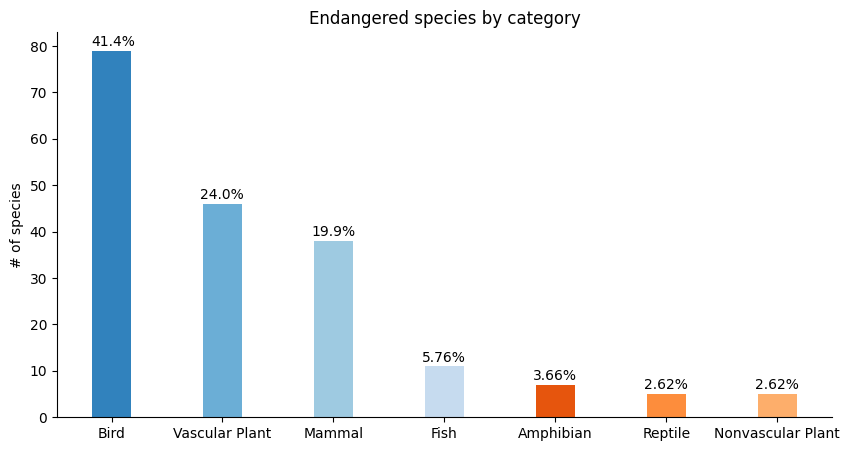

<Figure size 640x480 with 0 Axes>

In [104]:
plt.figure(figsize=(10,5))

ax = plt.subplot()
plt.bar(endangered_spec_cat["category"], endangered_spec_cat["count"], color=colors, width=0.35)

ax.set(title='Endangered species by category', xlabel='', ylabel='# of species')
plt.xticks(ha="center")

ax.annotate(text='41.4%', xy=(-0.18, 80))
ax.annotate(text='24.0%', xy=(0.8, 47))
ax.annotate(text='19.9%', xy=(1.8, 39))
ax.annotate(text='5.76%', xy=(2.8, 12))
ax.annotate(text='3.66%', xy=(3.8, 8))
ax.annotate(text='2.62%', xy=(4.8, 6))
ax.annotate(text='2.62%', xy=(5.8, 6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
plt.clf()

## 4. Conclusion

We can see that there is only a portion of the observed species that are somehow endangered - just above 3% of all observed species. Almost half of the endangered species are birds (41%), following by vascular plants and mammals (24% and 19,9%).  
Most of the endangered species are "Species of concern" (more than 84%). More than 8% of endangered species are "Endangered".  
We can see that there is large gap between number of observed species in parks. This could be the reason for not allocating the observations equally or just the indication of the park size, Yellowstone being the largest.